# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">EDA for Car Price Predictor - Bhuvan</p>

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands car_name, brand, model, vehicle_age, km_driven, seller_type, fuel_type,transmission_type, mileage, engine, max_power, seats, selling_price.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/manishkr1754/cardekho-used-car-data
- The data consists of 13 column and 15411 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [12]:
df = pd.read_csv('C:/DS-project/Car_price_prediction/notebook/data/cardekho_dataset.csv')

#### Show Top 5 Records

In [13]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### Shape of the dataset

In [15]:
df.shape

(15411, 13)

### 2.2 Dataset information

- car_name: Car's Full name, which includes brand and specific model name.
- brand: Brand Name of the particular car.
- model: Exact model name of the car of a particular brand.
- seller_type: Which Type of seller is selling the used car
- fuel_type: Fuel used in the used car, which was put up on sale.
- transmission_type: Transmission used in the used car, which was put on sale.
- vehicle_age: The count of years since car was bought.
- mileage: It is the number of kilometer the car runs per litre.
- engine: It is the engine capacity in cc(cubic centimeters)
- max_power: Max power it produces in BHP.
- seats: Total number of seats in car.
- selling_price: The sale price which was put up on website.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [16]:
df.isna().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [17]:
df.duplicated().sum()

167

### Removing the duplicate values

In [29]:
df_cleaned = df.drop_duplicates()

In [30]:
df_cleaned.shape

(15244, 13)

#### There are 167 duplicates  values in the data set and they are removed 

### 3.3 Check data types

In [31]:
# Check Null and Dtypes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15244 non-null  object 
 1   brand              15244 non-null  object 
 2   model              15244 non-null  object 
 3   vehicle_age        15244 non-null  int64  
 4   km_driven          15244 non-null  int64  
 5   seller_type        15244 non-null  object 
 6   fuel_type          15244 non-null  object 
 7   transmission_type  15244 non-null  object 
 8   mileage            15244 non-null  float64
 9   engine             15244 non-null  int64  
 10  max_power          15244 non-null  float64
 11  seats              15244 non-null  int64  
 12  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


### 3.4 Checking the number of unique values of each column

In [36]:
df_cleaned.nunique()

car_name              121
brand                  32
model                 120
vehicle_age            24
km_driven            3688
seller_type             3
fuel_type               5
transmission_type       2
mileage               411
engine                110
max_power             342
seats                   8
selling_price        1086
dtype: int64

### 3.5 Check statistics of data set

In [37]:
df_cleaned.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326161,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.808760,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


#### Insight
- From above description of numerical data, 
- Vechile mim age is 0 and max is 29 
- Vechile mileage min is 4 and max is 33.54

### 3.7 Exploring Data

In [38]:
df_cleaned.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [46]:
print("Categories in 'Car name' variable:     ",end=" " )
print(df_cleaned['car_name'].unique())

print("Categories in 'Brand' variable:  ",end=" ")
print(df_cleaned['brand'].unique())

print("Categories in'Model:",end=" " )
print(df_cleaned['model'].unique())

print("Categories in 'Vehicle age' variable:     ",end=" " )
print(df_cleaned['vehicle_age'].unique())

print("Categories in 'KM driven' variable:     ",end=" " )
print(df_cleaned['km_driven'].unique())

print("Categories in 'Seller type' variable:     ",end=" " )
print(df_cleaned['seller_type'].unique())

print("Categories in 'Fuel type' variable:     ",end=" " )
print(df_cleaned['fuel_type'].unique())

print("Categories in 'Transmission type' variable:     ",end=" " )
print(df_cleaned['transmission_type'].unique())

print("Categories in 'Mileage' variable:     ",end=" " )
print(df_cleaned['mileage'].unique())

print("Categories in 'Engine' variable:     ",end=" " )
print(df_cleaned['engine'].unique())

print("Categories in 'Max power' variable:     ",end=" " )
print(df_cleaned['max_power'].unique())

print("Categories in 'Seats' variable:     ",end=" " )
print(df_cleaned['seats'].unique())


Categories in 'Car name' variable:      ['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1

In [47]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_cleaned.columns if df_cleaned[feature].dtype != 'O']
categorical_features = [feature for feature in df_cleaned.columns if df_cleaned[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [48]:
df_cleaned.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

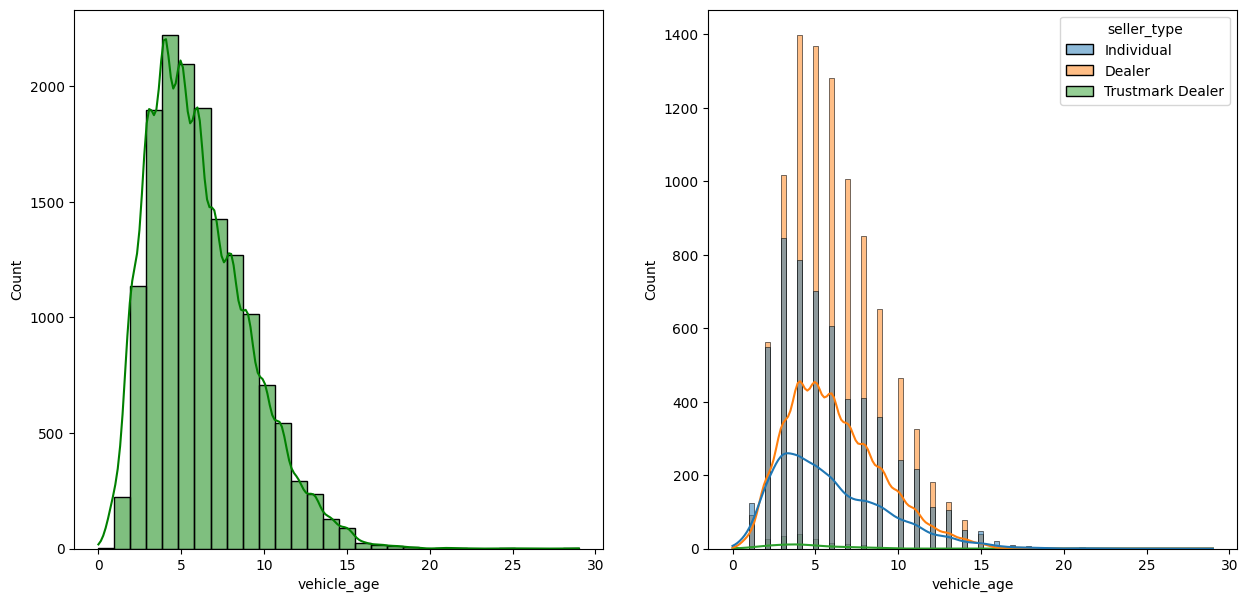

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_cleaned,x='vehicle_age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_cleaned,x='vehicle_age',kde=True,hue='seller_type')
plt.show()

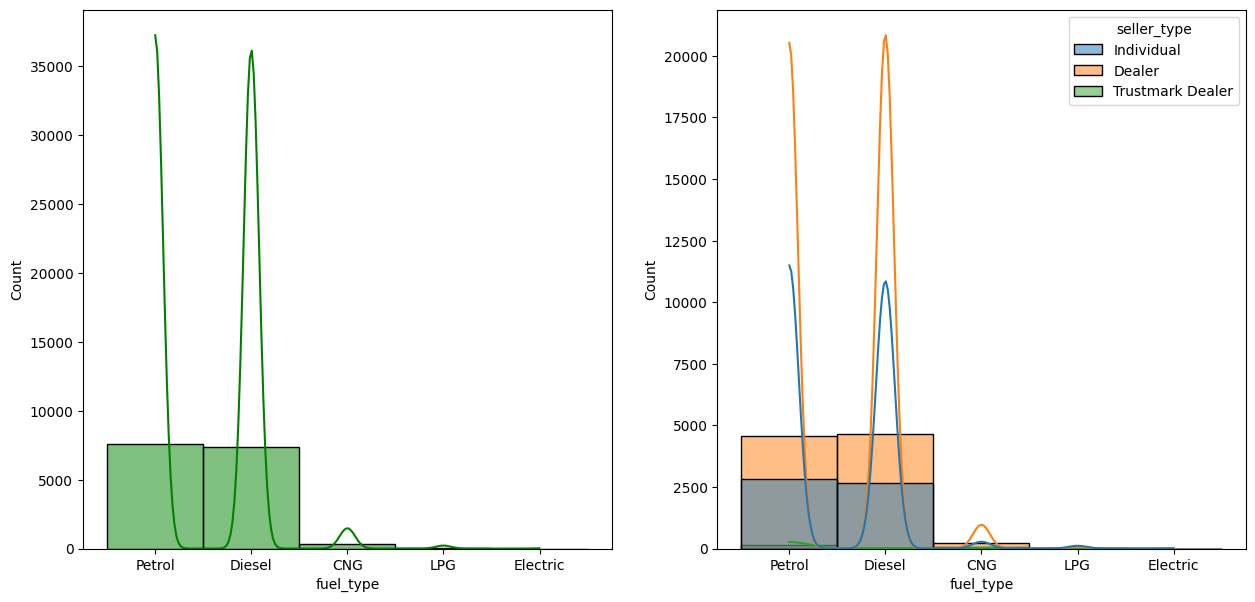

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_cleaned,x='fuel_type',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_cleaned,x='fuel_type',kde=True,hue='seller_type')
plt.show()

#####  Insights
- Petrol and Desiel Vechiles are tend to equal and CNG vechiles are less.